# Word embedding

In [1]:
from tensorflow import keras as keras

## Learning word embeddings with the Embedding layer

In [2]:
# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [3]:
model = keras.models.Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(keras.layers.Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(keras.layers.Flatten())

# We add the classifier on top
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

W1017 15:43:41.366778 140735720936320 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 77us/sample - loss: 0.6627 - acc: 0.6346 - val_loss: 0.6045 - val_acc: 0.7004
Epoch 2/10
20000/20000 [==============================] - 1s 44us/sample - loss: 0.5282 - acc: 0.7574 - val_loss: 0.5200 - val_acc: 0.7306
Epoch 3/10
20000/20000 [==============================]

## from raw text to word embeddings

### Download the IMDB data as raw text

http://ai.stanford.edu/~amaas/data/sentiment/ 

首先，打开 http://mng.bz/0tIo 下载原始IMDB 数据集并解压

In [4]:
datasets_addr = '/Users/momo/Documents/keras_datasets'

import os

imdb_dir = os.path.join(datasets_addr, 'aclImdb')
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [5]:
labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [6]:
labels[-10:]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [7]:
texts[:3]

["Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.",
 'Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through the TV and kill me. did they really think 

In [8]:
texts[-3:]

["Last November, I had a chance to see this film at the Reno Film Festival. I have to say that it was a lot of fun. A few tech errors aside, it was a great experience. I loved the writing and acting, especially from the guy that played the lead role. There is a lot of heart in this movie, a lot of wit to. I got a chance to speak with a few of the filmmakers after it was done, and they seemed real nice. All in all the whole movie was just a positive experience, and one I'd definitely recommend. The story was entertaining and cool, as a woman I've been through a lot of the same problems as the lead guy, and I could really understand his problems because of it. The movie does a great job of giving us people we can sympathize with. The friends in the movie are really well written to, they are realistic. I know people like these, I only wish Imy friends and I could sound as cool as these people when we talk. The whole movie is just real cool, I wish there were more films out there like it.<

### Tokenize the data

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [10]:
x_train[0]

array([   8, 3867,   12,   73, 3226,  473,   25,   74, 7201,   31, 2300,
         31, 8150,    8,   25,  616,   12,    9,   13,   21,   61,  611,
         18,   88,   12,    1,  893,   13,  620,   31,  276,    3, 2154,
       6257,   36,    1, 3959,    2, 4684,  742,  385,  206,    3, 6813,
          7,    7,  243,   48,    6,  314,  493,    6,    1,  884,    4,
        135,   81,   51,   33,   68,  255,    5,   27,  473,  244,   71,
        877,    1,    5,  604,    1,  473,  135,   85,    3, 3219, 4520,
       2826,    6,   35, 1040,   56,    6, 5030,    5,   27, 2518,    2,
         20,    2,   20,    7,    7, 2289, 1201,   16,   39,  206,    1,
         19], dtype=int32)

### Download the GloVe word embeddings

打开 https://nlp.stanford.edu/projects/glove 下载2014 年英文维基百科的预计算嵌入。这是一个822 MB 的压缩文件，文件名是 glove.6B.zip，里面包含400 000 个单词（或非单词的标记）的100 维嵌入向量

In [11]:
datasets_addr = '/Users/momo/Documents/keras_datasets'
glove_dir = os.path.join(datasets_addr, 'glove.6B')

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


接下来，需要构建一个可以加载到Embedding 层中的嵌入矩阵。它必须是一个形状为(max_words, embedding_dim) 的矩阵，对于单词索引（在分词时构建）中索引为i 的单词，这个矩阵的元素i 就是这个单词对应的embedding_dim 维向量。注意，索引0 不应该代表任何单词或标记，它只是一个占位符

In [12]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [13]:
embedding_matrix.shape

(10000, 100)

In [14]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [-0.44036001,  0.31821999,  0.10778   , ..., -1.29849994,
         0.11824   ,  0.64845002],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.54539001, -0.31817999, -0.016281  , ..., -0.44865   ,
         0.067047  ,  0.17975999]])

### Define a model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### Load the GloVe embeddings in the model

Embedding 层只有一个权重矩阵，是一个二维的浮点数矩阵，其中每个元素i 是与索引i相关联的词向量。够简单。将准备好的GloVe 矩阵加载到Embedding 层中，即模型的第一层。

此外，需要冻结Embedding 层（即将其trainable 属性设为False），其原理和预训练的卷积神经网络特征相同。如果一个模型的一部分是经过预训练的（如Embedding层），而另一部分是随机初始化的（如分类器），那么在训练期间不应该更新预训练的部分，以避免丢失它们所保存的信息。随机初始化的层会引起较大的梯度更新，会破坏已经学到的特征。

In [16]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

### Train and evaluate

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('models/pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/sample - loss: 0.9723 - acc: 0.4650 - val_loss: 0.6918 - val_acc: 0.5340
Epoch 2/10
200/200 [==============================] - 1s 4ms/sample - loss: 0.6659 - acc: 0.6350 - val_loss: 0.6872 - val_acc: 0.5488
Epoch 3/10
200/200 [==============================] - 1s 4ms/sample - loss: 0.5959 - acc: 0.6700 - val_loss: 0.7330 - val_acc: 0.5073
Epoch 4/10
200/200 [==============================] - 1s 4ms/sample - loss: 0.4588 - acc: 0.7950 - val_loss: 1.0843 - val_acc: 0.4962
Epoch 5/10
200/200 [==============================] - 1s 4ms/sample - loss: 0.2839 - acc: 0.9100 - val_loss: 1.0565 - val_acc: 0.5056
Epoch 6/10
200/200 [==============================] - 1s 4ms/sample - loss: 0.2728 - acc: 0.8900 - val_loss: 1.7564 - val_acc: 0.4956
Epoch 7/10
200/200 [==============================] - 1s 4ms/sample - loss: 0.2351 - acc: 0.9150 - val_loss: 1.1815 - val_acc: 0.5138
Epoch 8/10
200

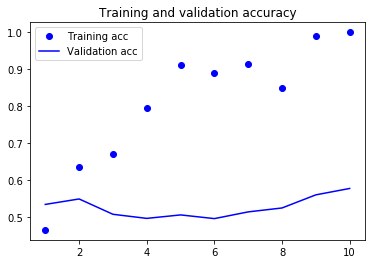

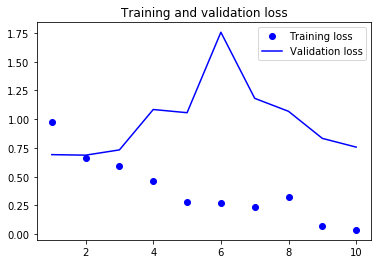

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

模型很快就开始过拟合，考虑到训练样本很少，这一点也不奇怪。出于同样的原因，验证精度的波动很大，但似乎达到了接近60%。

训练样本数太少，所以模型性能严重依赖于你选择的200 个样本，而样本是随机选择的。如果你得到的结果很差，可以尝试重新选择200 个不同的随机样本，你可以将其作为练习（在现实生活中无法选择自己的训练数据）。

也可以在不加载预训练词嵌入、也不冻结嵌入层的情况下训练相同的模型。在这种情况下，你将会学到针对任务的输入标记的嵌入。如果有大量的可用数据，这种方法通常比预训练词嵌入更加强大，但本例只有200 个训练样本。

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/sample - loss: 0.6946 - acc: 0.5450 - val_loss: 0.6921 - val_acc: 0.5190
Epoch 2/10
200/200 [==============================] - 1s 3ms

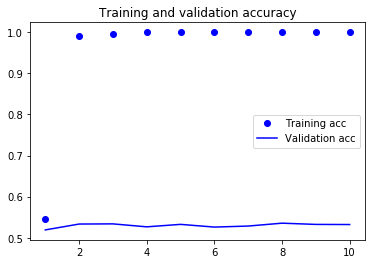

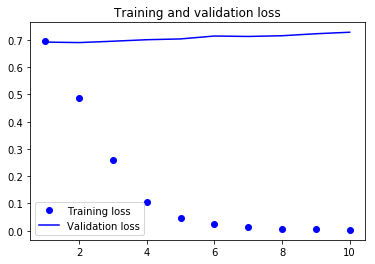

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

验证精度停留在50% 多一点。因此，在本例中，预训练词嵌入的性能要优于与任务一起学习的嵌入。如果增加样本数量，情况将很快发生变化

In [22]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [23]:
model.load_weights('models/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.7699184497451782, 0.569]